In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import seaborn as sea

## K Means Clustering with Python
This notebook is on K - Means Clustering in Python. 

### Method Used
K Means Clustering is an unsupervised learning algorithm that tries to cluster 
data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

In [ ]:
df  = pd.read_csv("/data.csv")

In [ ]:
df

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


### The Data
This data does conatain labels but we will be removing them as we build our model. What this label is used for is for us to measure the preformance of our model as we build it. Note that for a normal k - means dataset, we will not have labels and the model will be on its' own for building and classifying clusters. 
___

We will use a data frame with 777 observations on the following 18 variables.

##### Variables
- Private - A factor with levels No and Yes indicating private or public university
- Apps - Number of applications received
- Accept - Number of applications accepted
- Enroll - Number of new students enrolled
- Top10perc - Pct. new students from top 10% of H.S. class
- Top25perc - Pct. new students from top 25% of H.S. class
- F.Undergrad - Number of fulltime undergraduates
- P.Undergrad - Number of parttime undergraduates
- Outstate - Out-of-state tuition
- Room.Board - Room and board costs
- Books - Estimated book costs
- Personal - Estimated personal spending
- PhD - Pct. of faculty with Ph.D.’s
- Terminal - Pct. of faculty with terminal degree
- S.F.Ratio - Student/faculty ratio
- perc.alumni - Pct. alumni who donate
- Expend - Instructional expenditure per student
- Grad.Rate - Graduation rate


___
Below, we look at some data analysis on the dataset to see the relationship between the features in the dataset. We will be using many plots and feataures to find a good relationship
___

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


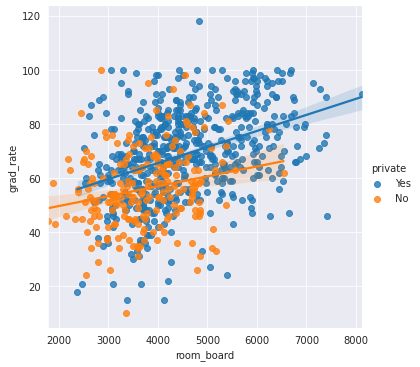

In [ ]:
#we look at the relationship between the cost of the board and room vs the graduation rate between the private and public universities 
sea.set_style("darkgrid")
sea.lmplot("room_board", "grad_rate", data = data, hue= "private")

What it looks like above is that the public universities have a lower graduation rate and cost for room and board. This can be seen as true as cost for private school is more than of public universities. 
___

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


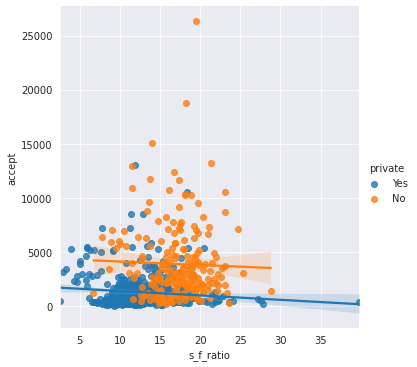

In [ ]:
sea.set_style("darkgrid")
sea.lmplot("s_f_ratio", "accept", data = data, hue= "private")

In the plot above, we can see that there is a diffrence between the two types of schools. The schools of private have a much lower student faculty ratio than of public universities. There is more applicants to public universities than of private. With this, we can use this to better set classification points for our data. 
___

### Cluster Creations 

In [ ]:
kmeans = KMeans(n_clusters= 2) 
#we know of two clusters of private and public universities

___
Above we load in the sklearn algorithm with the amount of clusters we have. Normally, we would first try the elbow method to find the correct or approprate number of clusters but in this case, we will not since we know there is only two. 

Below, we fit our data into the variable. For this we will need to drop a column that was our labels. We used this for looking at the data beforehand but will remove this for the use of kmeans and unsuperivsed learning. 
___

In [ ]:
kmeans.fit(df.drop("private", axis= 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#look at the cluster corrdinates.
#this is in multi dimentions and we can not classify this this graph format.
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01]])

In [ ]:
#Below, we create a function to convert the data of the private classifcation to interger inorder to us preformance measures on this model.
def schooltype(cluster):
  return 1 if cluster == "Yes" else 0

In [ ]:
#create a column data that converts this function
data["Type"] = data["private"].apply(schooltype)

In [ ]:
data[["Type"]]

,Type
0,1
1,1
2,1
3,1
4,1
...,...
772,0
773,1
774,1
775,1


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(data["Type"] , kmeans.labels_))
print(classification_report(data["Type"], kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



____
In this preformance measures, we can see the use of the confusion matrix and classification report. In the confusion matrix, we can see that from the output the result is that the model correctly identified most of the data as over 500 points of data was correctly identified in our model. We can also see that there were about 180 total misclassifications in our model. Although this is a lot, the result is that our model can correctly identify most of the points of data given without any identifcation of any labels. The model was able to build classifications on many of the given features alone. 

Although we are able to make this matrix, in using K-means algorithm we usually would not be able to make this because we would not have any labels. But we did this today to see the overall preformance of the model as a result after. 